In [ ]:
#Imports 
import os
import re
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
ruta = r"C:\Users\Rodne\Desktop\AproximationResults"
ruta_path = Path(ruta)


In [9]:
archivos = sorted([p for p in ruta_path.glob("approximation-results-*.csv")])

print(f"Total archivos encontrados: {len(archivos)}")
print("Ejemplos:")
for p in archivos[:10]:
    print(" -", p.name)


Total archivos encontrados: 162
Ejemplos:
 - approximation-results-ford-a-predicted-LogisticRegression-0-100.csv
 - approximation-results-ford-a-predicted-LogisticRegression-1000-1100.csv
 - approximation-results-ford-a-predicted-LogisticRegression-1200-1300.csv
 - approximation-results-ford-a-predicted-LogisticRegression-1400-1500.csv
 - approximation-results-ford-a-predicted-LogisticRegression-1600-1700.csv
 - approximation-results-ford-a-predicted-LogisticRegression-1800-1900.csv
 - approximation-results-ford-a-predicted-LogisticRegression-200-300.csv
 - approximation-results-ford-a-predicted-LogisticRegression-400-500.csv
 - approximation-results-ford-a-predicted-LogisticRegression-600-700.csv
 - approximation-results-ford-a-predicted-LogisticRegression-800-900.csv


In [10]:
pat = re.compile(
    r"^approximation-results-(?P<dataset>.+?)-(?P<label>predicted|training)-(?P<model>LogisticRegression|RandomForestClassifier)-(?P<start>\d+)-(?P<end>\d+)\.csv$"
)

validos = []
invalidos = []

for p in archivos:
    m = pat.match(p.name)
    if m:
        validos.append((p, m.groupdict()))
    else:
        invalidos.append(p)

print(f" Válidos: {len(validos)}")
print(f" Ignorados (formato raro): {len(invalidos)}")

if invalidos:
    print("\nIgnorados:")
    for p in invalidos[:15]:
        print(" -", p.name)


✅ Válidos: 160
⚠️ Ignorados (formato raro): 2

Ignorados:
 - approximation-results-ford-a-predicted-RandomForestClassifiertopk-1-10-12.csv
 - approximation-results-old.csv


In [11]:
rows = []
for p, g in validos:
    rows.append({
        "file": p.name,
        "path": str(p),
        "dataset": g["dataset"],
        "label": g["label"],                  # predicted / training
        "model": g["model"],                  # LogisticRegression / RandomForestClassifier
        "start": int(g["start"]),
        "end": int(g["end"])
    })

catalogo = pd.DataFrame(rows).sort_values(["dataset", "label", "model", "start"]).reset_index(drop=True)
catalogo.head(20)


,file,path,dataset,label,model,start,end
0,approximation-results-ford-a-predicted-Logisti...,C:\Users\Rodne\Desktop\AproximationResults\app...,ford-a,predicted,LogisticRegression,0,100
1,approximation-results-ford-a-predicted-Logisti...,C:\Users\Rodne\Desktop\AproximationResults\app...,ford-a,predicted,LogisticRegression,200,300
2,approximation-results-ford-a-predicted-Logisti...,C:\Users\Rodne\Desktop\AproximationResults\app...,ford-a,predicted,LogisticRegression,400,500
3,approximation-results-ford-a-predicted-Logisti...,C:\Users\Rodne\Desktop\AproximationResults\app...,ford-a,predicted,LogisticRegression,600,700
4,approximation-results-ford-a-predicted-Logisti...,C:\Users\Rodne\Desktop\AproximationResults\app...,ford-a,predicted,LogisticRegression,800,900
5,approximation-results-ford-a-predicted-Logisti...,C:\Users\Rodne\Desktop\AproximationResults\app...,ford-a,predicted,LogisticRegression,1000,1100
6,approximation-results-ford-a-predicted-Logisti...,C:\Users\Rodne\Desktop\AproximationResults\app...,ford-a,predicted,LogisticRegression,1200,1300
7,approximation-results-ford-a-predicted-Logisti...,C:\Users\Rodne\Desktop\AproximationResults\app...,ford-a,predicted,LogisticRegression,1400,1500
8,approximation-results-ford-a-predicted-Logisti...,C:\Users\Rodne\Desktop\AproximationResults\app...,ford-a,predicted,LogisticRegression,1600,1700
9,approximation-results-ford-a-predicted-Logisti...,C:\Users\Rodne\Desktop\AproximationResults\app...,ford-a,predicted,LogisticRegression,1800,1900


In [12]:
catalogo.groupby(["dataset", "label", "model"]).size()


dataset       label      model                 
ford-a        predicted  LogisticRegression        10
                         RandomForestClassifier    10
              training   LogisticRegression        10
                         RandomForestClassifier    10
starlight-c1  predicted  LogisticRegression        10
                         RandomForestClassifier    10
              training   LogisticRegression        10
                         RandomForestClassifier    10
starlight-c2  predicted  LogisticRegression        10
                         RandomForestClassifier    10
              training   LogisticRegression        10
                         RandomForestClassifier    10
starlight-c3  predicted  LogisticRegression        10
                         RandomForestClassifier    10
              training   LogisticRegression        10
                         RandomForestClassifier    10
dtype: int64

In [13]:
def detectar_solapes(df):
    df = df.sort_values("start")
    solapes = []
    prev_end = None
    prev_file = None
    for _, r in df.iterrows():
        if prev_end is not None and r["start"] < prev_end:
            solapes.append((prev_file, r["file"]))
        prev_end = r["end"]
        prev_file = r["file"]
    return solapes

for (ds, lab, model), sub in catalogo.groupby(["dataset", "label", "model"]):
    sol = detectar_solapes(sub)
    if sol:
        print("Solapes en:", ds, lab, model, sol[:5])


In [14]:
cat_forda_pred = catalogo[(catalogo["dataset"] == "ford-a") & (catalogo["label"] == "predicted")].copy()
cat_forda_pred.groupby(["model"]).size()


model
LogisticRegression        10
RandomForestClassifier    10
dtype: int64

In [15]:
sample_path = cat_forda_pred.iloc[0]["path"]
print("Sample:", sample_path)

# leer SOLO header
cols = pd.read_csv(sample_path, nrows=0).columns.tolist()
len(cols), cols[:30]


Sample: C:\Users\Rodne\Desktop\AproximationResults\approximation-results-ford-a-predicted-LogisticRegression-0-100.csv


(32,
 ['timestamp',
  'base_explainer',
  'mr_classifier',
  'reference_policy',
  'label',
  'dataset',
  'r2s',
  'r2s-mean',
  'r2s-std',
  'local_accuracy',
  'error',
  'runtimes-seconds',
  'runtimes-mean',
  'runtimes-std',
  'runtimes-p2p-seconds',
  'runtimes-p2p-mean',
  'runtimes-p2p-std',
  'runtimes-segmented-seconds',
  'runtimes-segmented-mean',
  'runtimes-segmented-std',
  'complexity',
  'complexity-mean',
  'complexity-std',
  'complexity-p2p',
  'complexity-p2p-mean',
  'complexity-p2p-std',
  'complexity-segmented',
  'complexity-segmented-mean',
  'complexity-segmented-std',
  'kendall-taus'])

In [16]:
runtime_cols = [c for c in cols if "runtime" in c.lower() or "runtimes" in c.lower()]
runtime_cols[:50], len(runtime_cols)


(['runtimes-seconds',
  'runtimes-mean',
  'runtimes-std',
  'runtimes-p2p-seconds',
  'runtimes-p2p-mean',
  'runtimes-p2p-std',
  'runtimes-segmented-seconds',
  'runtimes-segmented-mean',
  'runtimes-segmented-std'],
 9)

In [17]:
runtime_mean_cols = [c for c in cols if ("runtime" in c.lower() or "runtimes" in c.lower()) and "mean" in c.lower()]
runtime_mean_cols


['runtimes-mean', 'runtimes-p2p-mean', 'runtimes-segmented-mean']

In [18]:
def infer_runtime_mean_columns(columns):
    cols_lower = {c: c.lower() for c in columns}
    mean_cols = [c for c in columns if ("runtime" in cols_lower[c] or "runtimes" in cols_lower[c]) and "mean" in cols_lower[c]]

    p2p = [c for c in mean_cols if "p2p" in cols_lower[c]]
    seg = [c for c in mean_cols if ("segment" in cols_lower[c]) or ("segmented" in cols_lower[c]) or (re.search(r"\bseg\b", cols_lower[c]) is not None)]

    # ours: mean cols que NO son p2p ni segmented
    ours = [c for c in mean_cols if c not in set(p2p + seg)]

    return ours, p2p, seg, mean_cols

ours_cols, p2p_cols, seg_cols, mean_cols = infer_runtime_mean_columns(cols)

print("Candidatas OURS:", ours_cols)
print("Candidatas P2P:", p2p_cols)
print("Candidatas SEG:", seg_cols)
print("\nTodas las mean:", mean_cols)


Candidatas OURS: ['runtimes-mean']
Candidatas P2P: ['runtimes-p2p-mean']
Candidatas SEG: ['runtimes-segmented-mean']

Todas las mean: ['runtimes-mean', 'runtimes-p2p-mean', 'runtimes-segmented-mean']


### Dataset FordA

In [20]:
# Nos quedamos solo con Ford-A, predicted y LogisticRegression
cat_forda_lr = catalogo[
    (catalogo["dataset"] == "ford-a") &
    (catalogo["label"] == "predicted") &
    (catalogo["model"] == "LogisticRegression")
].copy()

len(cat_forda_lr)


10

In [21]:
dfs = []

for _, row in cat_forda_lr.iterrows():
    df = pd.read_csv(row["path"])
    
    # Nos quedamos SOLO con lo necesario
    df = df[[
        "dataset",
        "base_explainer",
        "runtimes-mean",
        "runtimes-p2p-mean",
        "runtimes-segmented-mean"
    ]].copy()
    
    # Añadir info de instancia (a partir del rango)
    df["instance_id"] = range(row["start"], row["start"] + len(df))
    
    dfs.append(df)

df_forda = pd.concat(dfs, ignore_index=True)

df_forda.shape


C:\Users\Rodne\AppData\Local\Temp\ipykernel_8588\4135240911.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_forda = pd.concat(dfs, ignore_index=True)


(12000, 6)

In [22]:
df_forda.head()


,dataset,base_explainer,runtimes-mean,runtimes-p2p-mean,runtimes-segmented-mean,instance_id
0,ford-a,shap,0.301481,13.283248,4.284808,0
1,ford-a,shap,0.301481,13.283248,4.284808,1
2,ford-a,shap,0.301481,13.283248,4.284808,2
3,ford-a,shap,0.301481,13.283248,4.284808,3
4,ford-a,shap,0.301481,13.283248,4.284808,4


In [23]:
df_forda.isna().sum()


dataset                    0
base_explainer             0
runtimes-mean              0
runtimes-p2p-mean          0
runtimes-segmented-mean    0
instance_id                0
dtype: int64

In [24]:
(df_forda[[
    "runtimes-mean",
    "runtimes-p2p-mean",
    "runtimes-segmented-mean"
]] <= 0).sum()


runtimes-mean              0
runtimes-p2p-mean          0
runtimes-segmented-mean    0
dtype: int64

In [25]:
df_forda = df_forda.rename(columns={
    "runtimes-mean": "runtime_ours",
    "runtimes-p2p-mean": "runtime_p2p",
    "runtimes-segmented-mean": "runtime_segmented"
})


In [26]:
df_forda["speedup_p2p"] = df_forda["runtime_p2p"] / df_forda["runtime_ours"]
df_forda["speedup_segmented"] = df_forda["runtime_segmented"] / df_forda["runtime_ours"]


In [27]:
df_forda[["speedup_p2p", "speedup_segmented"]].describe()


,speedup_p2p,speedup_segmented
count,12000.000000,12000.000000
mean,30.658718,4.064027
std,9.427391,5.976928
min,16.594288,0.402260
25%,23.772653,0.571941
50%,29.489926,0.722128
75%,35.584675,3.810040
max,54.580633,17.235722


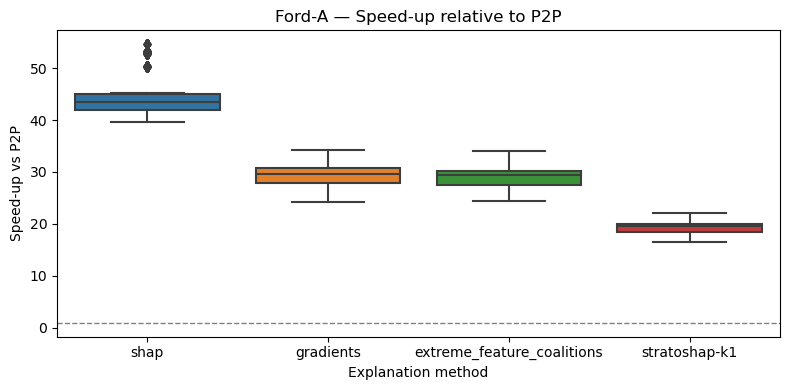

In [29]:
plt.figure(figsize=(8, 4))

sns.boxplot(
    data=df_forda,
    x="base_explainer",
    y="speedup_p2p"
)

plt.axhline(1, color="gray", linestyle="--", linewidth=1)
plt.ylabel("Speed-up vs P2P")
plt.xlabel("Explanation method")
plt.title("Ford-A — Speed-up relative to P2P")
plt.tight_layout()
plt.show()


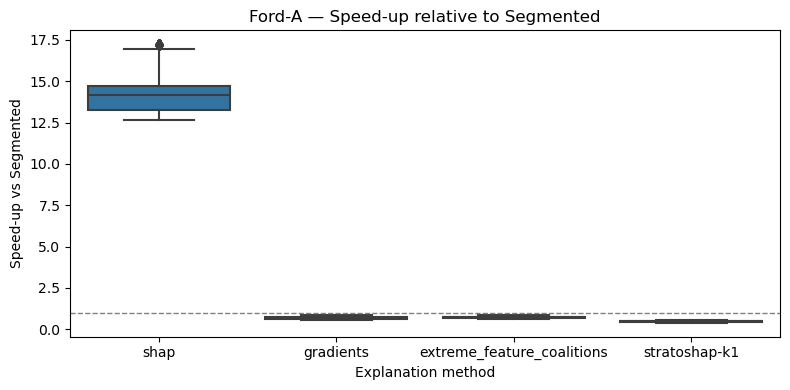

In [30]:
plt.figure(figsize=(8, 4))

sns.boxplot(
    data=df_forda,
    x="base_explainer",
    y="speedup_segmented"
)

plt.axhline(1, color="gray", linestyle="--", linewidth=1)
plt.ylabel("Speed-up vs Segmented")
plt.xlabel("Explanation method")
plt.title("Ford-A — Speed-up relative to Segmented")
plt.tight_layout()
plt.show()


In [31]:
summary = (
    df_forda
    .groupby("base_explainer")[["speedup_p2p", "speedup_segmented"]]
    .median()
    .reset_index()
)

summary


,base_explainer,speedup_p2p,speedup_segmented
0,extreme_feature_coalitions,29.447858,0.727655
1,gradients,29.586785,0.711379
2,shap,43.537314,14.177403
3,stratoshap-k1,19.537664,0.475494


## RandomForest 

In [41]:
# Nos quedamos solo con Ford-A, predicted y RandomForest
cat_forda_rf = catalogo[
    (catalogo["dataset"] == "ford-a") &
    (catalogo["label"] == "predicted") &
    (catalogo["model"] == "RandomForestClassifier")
].copy()

len(cat_forda_rf), cat_forda_rf.head()



(10,
                                                  file  \
 10  approximation-results-ford-a-predicted-RandomF...   
 11  approximation-results-ford-a-predicted-RandomF...   
 12  approximation-results-ford-a-predicted-RandomF...   
 13  approximation-results-ford-a-predicted-RandomF...   
 14  approximation-results-ford-a-predicted-RandomF...   
 
                                                  path dataset      label  \
 10  C:\Users\Rodne\Desktop\AproximationResults\app...  ford-a  predicted   
 11  C:\Users\Rodne\Desktop\AproximationResults\app...  ford-a  predicted   
 12  C:\Users\Rodne\Desktop\AproximationResults\app...  ford-a  predicted   
 13  C:\Users\Rodne\Desktop\AproximationResults\app...  ford-a  predicted   
 14  C:\Users\Rodne\Desktop\AproximationResults\app...  ford-a  predicted   
 
                      model  start  end  
 10  RandomForestClassifier      0  100  
 11  RandomForestClassifier    200  300  
 12  RandomForestClassifier    400  500  
 13  RandomFo

In [42]:
import pandas as pd

dfs = []
for p in cat_forda_rf["path"].tolist():  # <-- asegúrate que tu catálogo tiene una columna 'path'
    try:
        dfi = pd.read_csv(p)
        # Si viene "vacío" o con filas nulas, lo saltamos
        if dfi is None or dfi.empty:
            continue
        dfs.append(dfi)
    except Exception as e:
        print("Error leyendo:", p, "|", e)

df_rf_raw = pd.concat(dfs, ignore_index=True)
df_rf_raw.shape


(12000, 32)

In [43]:
# Columnas mínimas que usaremos (como en LR)
cols_keep = ["dataset", "base_explainer", "runtimes-mean", "runtimes-p2p-mean", "runtimes-segmented-mean"]

missing = [c for c in cols_keep if c not in df_rf_raw.columns]
print("Faltan:", missing)

df_rf = df_rf_raw[cols_keep].copy()

# Crea instance_id: si no existe en el CSV, lo generamos por grupo
# (Esto asume que cada fila representa una instancia y se repiten por explainer)
df_rf["instance_id"] = df_rf.groupby(["dataset", "base_explainer"]).cumcount()

# Renombrar a tu estándar
df_rf = df_rf.rename(columns={
    "runtimes-mean": "runtime_ours",
    "runtimes-p2p-mean": "runtime_p2p",
    "runtimes-segmented-mean": "runtime_segmented"
})

df_rf.head(), df_rf.shape


Faltan: []


(  dataset base_explainer  runtime_ours  runtime_p2p  runtime_segmented  \
 0  ford-a           shap      0.343346     3.082595           1.090967   
 1  ford-a           shap      0.343346     3.082595           1.090967   
 2  ford-a           shap      0.343346     3.082595           1.090967   
 3  ford-a           shap      0.343346     3.082595           1.090967   
 4  ford-a           shap      0.343346     3.082595           1.090967   
 
    instance_id  
 0            0  
 1            1  
 2            2  
 3            3  
 4            4  ,
 (12000, 6))

In [44]:
# Speed-ups (tal como Luis pidió)
df_rf["speedup_p2p"] = df_rf["runtime_p2p"] / df_rf["runtime_ours"]
df_rf["speedup_segmented"] = df_rf["runtime_segmented"] / df_rf["runtime_ours"]

# Revisión rápida
df_rf[["speedup_p2p", "speedup_segmented"]].describe()


,speedup_p2p,speedup_segmented
count,12000.000000,12000.000000
mean,6.437183,0.917290
std,2.089293,1.394442
min,4.024617,0.096797
25%,4.977124,0.118436
50%,5.889149,0.145983
75%,6.740407,0.648457
max,11.616832,3.989133


In [45]:
df_rf["valid_for_reporting"] = True
df_rf.loc[df_rf["base_explainer"].str.contains("grad", case=False, na=False), "valid_for_reporting"] = False

df_rf["valid_for_reporting"].value_counts()


valid_for_reporting
True     9000
False    3000
Name: count, dtype: int64

In [47]:
df_rf_clean = df_rf[df_rf["base_explainer"] != "gradients"].copy()


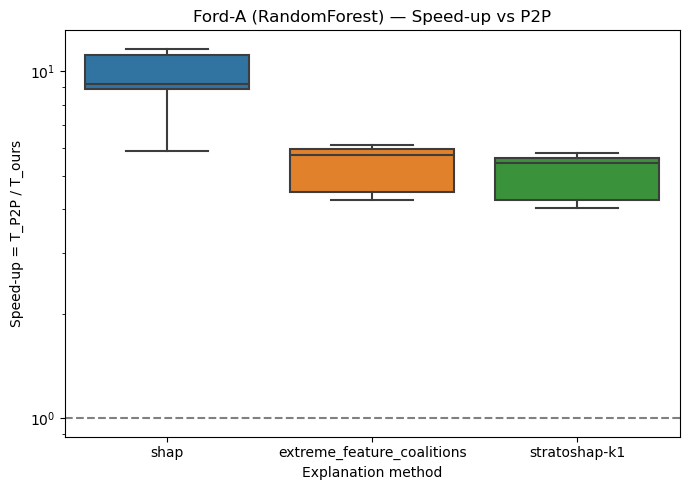

In [48]:
plt.figure(figsize=(7,5))
sns.boxplot(
    data=df_rf_clean,
    x="base_explainer",
    y="speedup_p2p"
)

plt.yscale("log")  # recomendable
plt.axhline(1.0, linestyle="--", color="gray")
plt.title("Ford-A (RandomForest) — Speed-up vs P2P")
plt.xlabel("Explanation method")
plt.ylabel("Speed-up = T_P2P / T_ours")
plt.tight_layout()
plt.show()


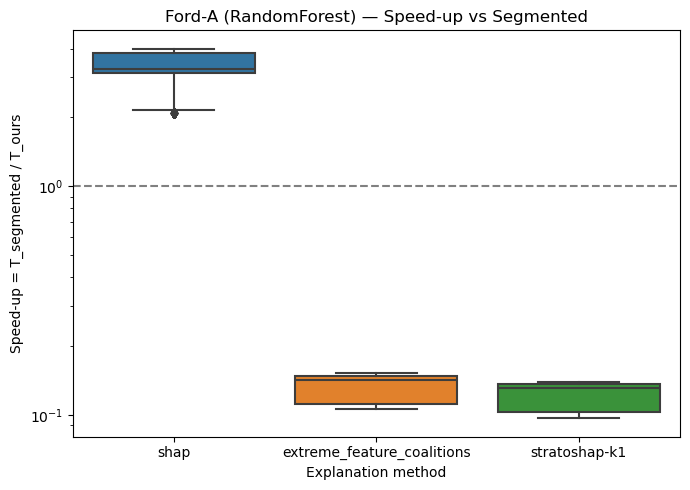

In [49]:
plt.figure(figsize=(7,5))
sns.boxplot(
    data=df_rf_clean,
    x="base_explainer",
    y="speedup_segmented"
)

plt.yscale("log")  # importante aquí
plt.axhline(1.0, linestyle="--", color="gray")
plt.title("Ford-A (RandomForest) — Speed-up vs Segmented")
plt.xlabel("Explanation method")
plt.ylabel("Speed-up = T_segmented / T_ours")
plt.tight_layout()
plt.show()


In [53]:
if {"runtime_ours", "runtime_p2p", "runtime_segmented"}.issubset(df_rf.columns):
    # (opcional) asegurar numéricos
    for c in ["runtime_ours", "runtime_p2p", "runtime_segmented"]:
        df_rf[c] = pd.to_numeric(df_rf[c], errors="coerce")
    df_rf["speedup_p2p"] = df_rf["runtime_p2p"] / df_rf["runtime_ours"]
    df_rf["speedup_segmented"] = df_rf["runtime_segmented"] / df_rf["runtime_ours"]

    print(df_rf[["dataset","base_explainer","instance_id","runtime_ours","runtime_p2p","runtime_segmented","speedup_p2p","speedup_segmented"]].head())

else:
    def _to_list(x):
        if pd.isna(x): 
            return []
        s = str(x)
        sep = ';' if ';' in s else ','
        return [float(v) for v in s.split(sep) if v.strip() and v.strip().lower() != 'nan']

    col_ours = "runtimes-seconds"
    col_p2p  = "runtimes-p2p-seconds"
    col_seg  = "runtimes-segmented-seconds"

    missing = [c for c in [col_ours, col_p2p, col_seg] if c not in df_rf.columns]
    if missing:
        raise KeyError(f"Faltan columnas esperadas: {missing}. Columnas actuales: {list(df_rf.columns)}")

    df_rf["t_ours_list"] = df_rf[col_ours].apply(_to_list)
    df_rf["t_p2p_list"]  = df_rf[col_p2p].apply(_to_list)
    df_rf["t_seg_list"]  = df_rf[col_seg].apply(_to_list)

    # Ejemplo: tomar promedio por fila (si cada celda trae una lista de runtimes por instancia)
    df_rf["runtime_ours"] = df_rf["t_ours_list"].apply(lambda xs: np.mean(xs) if len(xs) else np.nan)
    df_rf["runtime_p2p"]  = df_rf["t_p2p_list"].apply(lambda xs: np.mean(xs) if len(xs) else np.nan)
    df_rf["runtime_segmented"] = df_rf["t_seg_list"].apply(lambda xs: np.mean(xs) if len(xs) else np.nan)

    df_rf["speedup_p2p"] = df_rf["runtime_p2p"] / df_rf["runtime_ours"]
    df_rf["speedup_segmented"] = df_rf["runtime_segmented"] / df_rf["runtime_ours"]

    print(df_rf[["dataset","base_explainer","runtime_ours","runtime_p2p","runtime_segmented","speedup_p2p","speedup_segmented"]].head())


  dataset base_explainer  instance_id  runtime_ours  runtime_p2p  \
0  ford-a           shap            0      0.343346     3.082595   
1  ford-a           shap            1      0.343346     3.082595   
2  ford-a           shap            2      0.343346     3.082595   
3  ford-a           shap            3      0.343346     3.082595   
4  ford-a           shap            4      0.343346     3.082595   

   runtime_segmented  speedup_p2p  speedup_segmented  
0           1.090967     8.978089           3.177454  
1           1.090967     8.978089           3.177454  
2           1.090967     8.978089           3.177454  
3           1.090967     8.978089           3.177454  
4           1.090967     8.978089           3.177454  
